# AI-Driven Laboratory Safety Analysis

In [44]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import LabelEncoder,OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from scipy.stats import ttest_ind
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import TfidfVectorizer
import plotly.express as px
import plotly.graph_objects as go
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, f1_score, confusion_matrix
from catboost import CatBoostClassifier

In [43]:
%pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.9 MB/s eta 0:00:00


## Table of Contents

- [1-Introduction & Problem Statement](#1--Introduction--Problem-Statement)
- [2-About the Dataset](#2--About-the-Dataset)
- [3-Exploratory Data Analysis (EDA)](#3--Exploratory-Data-Analysis--EDA-)
- [4-Model](#4--Model)

# 1-Introduction & Problem Statement
## Laboratories are environments that handle hazardous chemicals and complex equipment.
## Accidents often occur due to human error, lack of PPE, or improper storage.
## This project analyzes 150 documented laboratory incidents to identify:
###     - The most common causes of accidents
###     - The relationship between severity and PPE/training
###     - How computer vision and AI can prevent these incidents
### The findings will support developing an AI-based Lab Safety Monitoring System.

# 2-About the Dataset

This dataset documents **150 laboratory incidents** from academic and research labs, each representing a real-world safety event.  
It provides valuable information for analyzing **causes, damages, and safety lessons** — making it ideal for building predictive and preventive safety systems using AI.

---

##Dataset Overview

| **Column Name** | **Short Description** |
|------------------|------------------------|
| **incident_id** | Unique identifier for each incident record. |
| **people_involved_type** | Number of people directly involved in the incident. |
| **damage_human** | Type of injury sustained by individuals. |
| **damage_lab** | Type of damage to laboratory equipment or infrastructure. |
| **severity** | Overall impact classification of the incident. |
| **chemicals** | Chemical(s) involved in the incident. |
| **cause** | Root cause(s) of the incident. |
| **narrative_description** | Short factual summary describing what happened. |
| **lessons_learned** | Safety takeaway(s) and recommended improvements. |
| **university** | University or institution where the incident occurred. |
| **source_URL** | Link to the original report or source document. |

---

##damage_human — *Type of Human Injury*

| **Tag** | **Definition** |
|----------|----------------|
| none | No injury. |
| burn | Thermal or chemical burn. |
| cut | Laceration from glass or tools. |
| puncture | Needle or sharp object injury. |
| eye injury | Injury to eye from beam, chemical, or debris. |
| inhalation | Fume or vapor intake causing symptoms. |
| dermal irritation | Minor chemical skin irritation. |
| impact injury | Blunt trauma (explosion, falling object). |
| frostbite | Cryogenic material exposure. |
| electric shock | Electrical injury. |
| needle stick | Injury from biohazardous needle. |
| biohazard exposure | Confirmed biological risk. |
| fall | Slip or trip resulting in injury. |
| auditory discomfort | Temporary hearing damage or ringing in ears. |
| amputation | Loss of body part due to incident. |
| chemical exposure | Direct contact with hazardous chemical (unspecified injury). |
| fatality | Death resulting from the incident. |
| unknown | Injury reported but type could not be determined. |

---

##damage_lab — *Type of Laboratory Damage*

| **Tag** | **Definition** |
|----------|----------------|
| fire | Flame or ignition (chemical or electrical). |
| thermal damage | Heat-induced damage to surfaces, containers, or equipment. |
| explosion | Violent rupture of vessel or material. |
| pressure release | Overpressure event from cryogenics or sealed vessels. |
| chemical release | Spill, vapor emission, or leak of a chemical. |
| corrosion damage | Degradation from chemical corrosion. |
| contamination | Unwanted chemical, biological, or particulate contamination. |
| frost damage | Cold-induced damage from cryogenics. |
| water damage | Damage caused by water exposure. |
| flooding | Large-scale water ingress into the lab. |
| equipment damage | Physical failure of device or tool. |
| electrical damage | Damage from electrical faults. |
| lab shutdown | Closure of lab due to safety or damage. |
| evacuation | Removal of personnel for safety reasons. |
| alarm activation | Triggering of alarms (fire, gas, etc.). |
| none | No lab/equipment/environmental damage. |

---

##severity — *Overall Incident Impact*

| **Tag** | **Definition** |
|----------|----------------|
| near miss | No injuries, no significant damage; incident had potential for harm but was avoided. |
| minor | Minor injury or lab damage; first aid only. |
| moderate | Injury requiring medical attention; moderate lab damage. |
| major | Serious injury or major lab damage (fire, explosion, shutdown). |
| severe | Fatality, permanent disability, or catastrophic lab damage. |

---

##cause — *Root Cause of the Incident*

| **Tag** | **Definition** |
|----------|----------------|
| human error | Mistake such as oversight, improper handling, or inattentiveness. |
| equipment failure | Mechanical or electrical breakdown of equipment. |
| improper storage | Storing materials under unsafe or incompatible conditions. |
| lack of training | Performing tasks without adequate instruction or awareness. |
| physical conditions | Environmental hazards (e.g., ventilation, lighting). |
| unknown inventory | Presence of unidentified chemicals. |
| missing label | Container missing proper identification. |
| chemical instability | Hazardous reaction due to degradation or contamination. |
| unknown | Root cause could not be determined. |
| legacy container | Old container left in storage posing hazard. |
| improper waste management | Unsafe disposal or mixing of chemical waste. |

---


##lessons_learned — *Safety Takeaways and Recommendations*

| **Tag** | **Definition** |
|----------|----------------|
| Train staff | Ensure all lab members receive proper safety and procedure training. |
| Use appropriate PPE | Emphasize use of personal protective equipment (gloves, coat, goggles). |
| Practice proper labeling | Label all chemical containers clearly. |
| Store chemicals under safe conditions | Store chemicals by reactivity, flammability, and temperature. |
| Maintain updated inventory | Regularly audit and document chemical inventory. |
| Dispose of unknown or expired substances | Remove degraded or ownerless chemicals safely. |
| Handle chemicals carefully | Encourage deliberate and careful chemical handling. |
| Follow standard operating procedures | Always follow written SOPs. |
| Maintain equipment safety features | Ensure protective devices and interlocks remain functional. |
| Follow hazardous waste protocols | Comply with regulations for chemical waste disposal. |


# 3-Exploratory Data Analysis (EDA)

We’ll explore:
1. What types of incidents occur most frequently?  
2. Which causes and damages lead to severe outcomes?  
3. Are human errors and PPE-related issues dominant?  
4. What do the lessons learned teach us about recurring risks?  
5. How can data insights guide our AI modules ?

In [2]:
# read data
df=pd.read_csv('Academic_Laboratory_Safety_Incidents_Dataset.csv', encoding='latin1')

In [3]:
df.head()

,incident_id,people_involved_type,damage_human,damage_lab,severity,chemicals,cause,narrative_description,lessons_learned,university,source_URL
0,1,individual,inhalation; dermal irritation,chemical release,minor,carbazole,chemical instability; legacy container; improp...,"While tagging legacy chemicals for disposal, a...",Train staff; Practice proper labeling; Store c...,The University of Texas at Austin,https://ehs.utexas.edu/planning-safe-research/...
1,2,individual,cut,explosion; equipment damage,moderate,unknown,equipment failure; human error,While performing flash chromatography in a fum...,Use appropriate PPE; Train staff; Maintain equ...,The University of Texas at Austin,https://ehs.utexas.edu/planning-safe-research/...
2,3,individual,none,fire,moderate,lithium aluminum hydride,human error; improper storage; lack of training,A researcher was weighing individual ~1 g port...,Train staff; Store chemicals under safe condit...,The University of Texas at Austin,https://ehs.utexas.edu/planning-safe-research/...
3,4,group,none,pressure release ; chemical release,minor,liquid nitrogen,equipment failure; physical conditions; human ...,While transporting a nitrogen Dewar from the r...,Maintain equipment safety features; Follow sta...,The University of Texas at Austin,https://ehs.utexas.edu/planning-safe-research/...
4,5,none,none,pressure release,minor,liquid argon,equipment failure,A liquid argon tank in a laboratory experience...,Maintain equipment safety features; Follow sta...,The University of Texas at Austin,https://ehs.utexas.edu/planning-safe-research/...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   incident_id            150 non-null    int64 
 1   people_involved_type   150 non-null    object
 2   damage_human           150 non-null    object
 3   damage_lab             150 non-null    object
 4   severity               150 non-null    object
 5   chemicals              150 non-null    object
 6   cause                  150 non-null    object
 7   narrative_description  150 non-null    object
 8   lessons_learned        150 non-null    object
 9   university             150 non-null    object
 10  source_URL             150 non-null    object
dtypes: int64(1), object(10)
memory usage: 13.0+ KB


In [5]:
df.shape

(150, 11)

In [6]:
#Check duplicates and missing values
print("\nMissing values:\n", df.isnull().sum())
print("\nUnique values per column:\n", df.nunique())


Missing values:
 incident_id              0
people_involved_type     0
damage_human             0
damage_lab               0
severity                 0
chemicals                0
cause                    0
narrative_description    0
lessons_learned          0
university               0
source_URL               0
dtype: int64

Unique values per column:
 incident_id              150
people_involved_type       3
damage_human              30
damage_lab                55
severity                   5
chemicals                126
cause                     57
narrative_description    150
lessons_learned          117
university                25
source_URL               107
dtype: int64


In [7]:
## Question 1: How severe are most laboratory incidents?
severity_counts = df['severity'].value_counts().sort_values(ascending=False)
severity_df = severity_counts.reset_index()
severity_df.columns = ['severity', 'count']
severity_df['severity'] = pd.Categorical(severity_df['severity'],
                                          categories=severity_df['severity'],
                                          ordered=True)
fig = px.bar(severity_df,
             x='severity',
             y='count',
             color='severity',
             title='Severity Distribution of Laboratory Incident',
             color_discrete_sequence=px.colors.qualitative.Bold)

fig.update_layout(
    xaxis_title="Severity Level",
    yaxis_title="Count of Incidents",
    bargap=0.2
)

fig.show()

In [8]:
## Question 2: What are the top root causes of these incidents?
df["cause"].value_counts()


,count
cause,
human error; lack of training,28
human error,26
equipment failure,8
human error; equipment failure,7
equipment failure; human error,6
human error; improper storage,5
human error; improper waste management; chemical instability,4
lack of training; human error,4
human error; improper storage; lack of training,3


In [9]:
# Create a copy to avoid overwriting original
df['cause_clean'] = df['cause'].str.lower()

In [10]:
# Group similar or combined causes
df['cause_clean'] = df['cause_clean'].replace({
    r'.*human error.*': 'human error',
    r'.*lack of training.*': 'lack of training',
    r'.*equipment failure.*': 'equipment failure',
    r'.*improper storage.*': 'improper storage',
    r'.*chemical instability.*': 'chemical instability',
    r'.*unknown inventory.*': 'unknown inventory',
    r'.*missing label.*': 'missing label',
    r'.*improper waste management.*': 'improper waste management',
    r'.*legacy container.*': 'legacy container',
    r'.*physical conditions.*': 'physical conditions',
    r'.*unknown.*': 'unknown'
}, regex=True)

# Group again to count clean causes
cause_clean_counts = df['cause_clean'].value_counts().reset_index()
cause_clean_counts.columns = ['Cause Category', 'Count']
cause_clean_counts = cause_clean_counts.sort_values(by='Count', ascending=False)

In [14]:
# Sort datafram
cause_clean_counts_sorted = cause_clean_counts.sort_values(by='Count', ascending=False)

cause_clean_counts_sorted['Cause Category'] = pd.Categorical(
    cause_clean_counts_sorted['Cause Category'],
    categories=cause_clean_counts_sorted['Cause Category'],
    ordered=True
)

fig = px.bar(
    cause_clean_counts_sorted,
    x='Cause Category',
    y='Count',
    color='Cause Category',
    title='Grouped Root Causes of Laboratory Incidents',
    color_discrete_sequence=px.colors.qualitative.Vivid
)

fig.update_layout(
    xaxis_title="Root Cause Category",
    yaxis_title="Number of Incidents",
    showlegend=False
)

fig.show()

In [ ]:
## Question 3: What are the most common types of human injuries?
df["damage_human"].value_counts()



,count
damage_human,
none,54
burn,24
cut,14
inhalation,10
eye injury,9
chemical exposure,8
impact injury,3
chemical exposure; burn,2
impact injury; cut,2


In [15]:
# Make a clean lowercase version
df['damage_human_clean'] = df['damage_human'].str.lower().fillna('none')

# Group similar and combined types into main categories
df['damage_human_clean'] = df['damage_human_clean'].replace({
    r'.*burn.*': 'burn',
    r'.*cut.*': 'cut',
    r'.*inhalation.*': 'inhalation',
    r'.*eye.*': 'eye injury',
    r'.*chemical exposure.*': 'chemical exposure',
    r'.*impact.*': 'impact injury',
    r'.*fall.*': 'fall',
    r'.*electric.*': 'electric shock',
    r'.*amputation.*': 'amputation',
    r'.*frost.*': 'frostbite',
    r'.*dermal.*': 'dermal irritation',
    r'.*auditory.*': 'auditory discomfort',
    r'.*fatal.*': 'fatality',
    r'.*biohazard.*': 'biohazard exposure',
    r'.*needle.*': 'needle stick',
    r'.*unknown.*': 'unknown',
    r'.*none.*': 'none'
}, regex=True)


In [16]:
damage_human_grouped = df['damage_human_clean'].value_counts().reset_index()
damage_human_grouped.columns = ['Human Injury Type', 'Count']
damage_human_grouped = damage_human_grouped.sort_values(by='Count', ascending=False)

fig = px.bar(
    damage_human_grouped,
    x='Human Injury Type',
    y='Count',
    color='Human Injury Type',
    title='Grouped Human Injury Types in Laboratory Incidents',
    color_discrete_sequence=px.colors.qualitative.Safe
)

fig.update_layout(
    xaxis_title="Grouped Injury Type",
    yaxis_title="Number of Incidents",
    showlegend=False
)
fig.show()


In [17]:
## Question 4: What kinds of laboratory damages are most frequent?
df['damage_lab'].value_counts()


,count
damage_lab,
none,34
explosion; equipment damage,23
chemical release,9
fire,8
equipment damage,6
explosion,4
fire; equipment damage,4
chemical release; evacuation,3
contamination,3


In [18]:
# Create a clean version for grouping
df['damage_lab_clean'] = df['damage_lab'].str.lower()

# Replace similar or combined tags with general categories
df['damage_lab_clean'] = df['damage_lab_clean'].replace({
    r'.*fire.*': 'fire',
    r'.*explosion.*': 'explosion',
    r'.*chemical release.*': 'chemical release',
    r'.*corrosion.*': 'corrosion damage',
    r'.*contamination.*': 'contamination',
    r'.*flood.*|.*water.*': 'water/flood damage',
    r'.*equipment.*': 'equipment damage',
    r'.*electrical.*': 'electrical damage',
    r'.*thermal.*': 'thermal damage',
    r'.*pressure.*': 'pressure release',
    r'.*frost.*': 'frost damage',
    r'.*lab shutdown.*': 'lab shutdown',
    r'.*evacuation.*': 'evacuation',
    r'.*alarm.*': 'alarm activation',
    r'.*none.*': 'none',
    r'.*unknown.*': 'unknown'
}, regex=True)


In [19]:
damage_lab_counts = df['damage_lab_clean'].value_counts().reset_index()
damage_lab_counts.columns = ['Lab Damage Type', 'Count']
damage_lab_counts = damage_lab_counts.sort_values(by='Count', ascending=False)

fig = px.bar(
    damage_lab_counts,
    x='Lab Damage Type',
    y='Count',
    color='Lab Damage Type',
    title='Grouped Laboratory Damage Types',
    color_discrete_sequence=px.colors.qualitative.Pastel
)

fig.update_layout(
    xaxis_title="Laboratory Damage Type",
    yaxis_title="Number of Incidents",
    showlegend=False
)

fig.show()


In [21]:
## Question 5: Which causes lead to the most severe outcomes?

df['severity_score'] = df['severity'].map({
    'near miss': 1,
    'minor': 2,
    'moderate': 3,
    'major': 4,
    'severe': 5
}).astype(float)

if 'cause_clean' in df.columns:
    cause_col = 'cause_clean'
else:
    cause_col = 'cause'

avg_sev = (
    df.groupby(cause_col)['severity_score']
    .mean()
    .sort_values(ascending=False)
    .reset_index()
)

fig = px.bar(
    avg_sev,
    x=cause_col,
    y='severity_score',
    color='severity_score',
    color_continuous_scale='Reds',
    title='Average Severity by Root Cause'
)

fig.update_layout(
    xaxis_title="Root Cause",
    yaxis_title="Average Severity Score",
    xaxis_tickangle=45,
)

fig.show()




In [35]:
## Question 6: Are PPE-related incidents more severe?

# Create a column to indicate if the incident is PPE-related
df['ppe_related'] = df['lessons_learned'].str.contains('PPE').astype(int)

# Calculate average severity by PPE relationship
avg_severity_ppe = (
    df.groupby('ppe_related')['severity_score']
    .mean()
    .reset_index()
)

# Add readable labels
avg_severity_ppe['ppe_label'] = avg_severity_ppe['ppe_related'].map({
    0: 'No PPE Mentioned',
    1: 'PPE-related'
})

fig = px.bar(
    avg_severity_ppe,
    x='ppe_label',
    y='severity_score',
    color='ppe_label',
    title='Average Severity of PPE-related vs Non-PPE Incidents',
    text=avg_severity_ppe['severity_score'].round(2),
    color_discrete_sequence=['#636EFA', '#EF553B']
)

fig.update_layout(
    xaxis_title="Incident Type",
    yaxis_title="Average Severity Score",
    showlegend=False
)

fig.show()

In [33]:
## Question 7: What is the relationship between human injuries and lab damage?
# Create cross-tab table
cross_tab = pd.crosstab(df['damage_human_clean'], df['damage_lab_clean'])

# Sort to keep only top types (optional, for clarity)
top_humans = cross_tab.sum(axis=1).sort_values(ascending=False).head(10).index
top_labs = cross_tab.sum(axis=0).sort_values(ascending=False).head(8).index
cross_tab_filtered = cross_tab.loc[top_humans, top_labs]

# Plot heatmap
fig = px.imshow(
    cross_tab_filtered,
    color_continuous_scale='Viridis',
    title='Relationship Between Human Injuries and Lab Damages',
    labels=dict(x="Lab Damage Type", y="Human Injury Type", color="Incident Count")
)

fig.update_layout(
    xaxis_title="Lab Damage Type",
    yaxis_title="Human Injury Type",
    plot_bgcolor="white",
    xaxis_tickangle=45,
    width=800,
    height=500
)

fig.show()


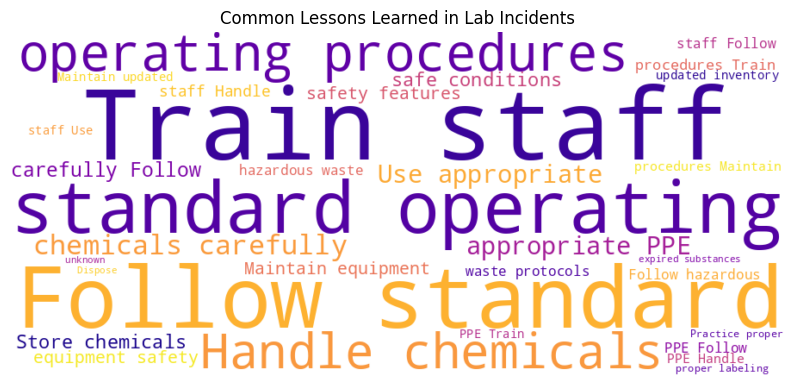

In [34]:
## Question 8: What are common patterns in Lessons Learned?

text = " ".join(df['lessons_learned'].dropna())
wordcloud = WordCloud(width=900, height=400, background_color='white',
                      colormap='plasma').generate(text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Common Lessons Learned in Lab Incidents")
plt.show()


In [36]:
## Question 9: Which keywords are most common across all lessons?

vectorizer = TfidfVectorizer(stop_words='english', max_features=15)
tfidf = vectorizer.fit_transform(df['lessons_learned'])
keywords = pd.Series(tfidf.toarray().sum(axis=0), index=vectorizer.get_feature_names_out()).sort_values(ascending=False)

fig = px.bar(keywords, x=keywords.index, y=keywords.values,
             title="Most Frequent Keywords in Safety Lessons",
             color=keywords.values, color_continuous_scale="Bluered_r")
fig.update_layout(xaxis_title="Keyword", yaxis_title="Importance (TF-IDF)",)
fig.show()


In [ ]:
## Question 10: How can we group incidents by risk profile?
encoded = pd.get_dummies(df[['cause','damage_lab','damage_human']])
kmeans = KMeans(n_clusters=4, random_state=42)
df['risk_cluster'] = kmeans.fit_predict(encoded)

pca = PCA(2)
reduced = pca.fit_transform(encoded)
df_plot = pd.DataFrame({'x':reduced[:,0], 'y':reduced[:,1], 'cluster':df['risk_cluster']})

fig = px.scatter(df_plot, x='x', y='y', color='cluster',
                 title="Clustering Laboratory Incidents by Risk Profile",
                 color_continuous_scale='Turbo')
fig.update_traces(marker=dict(size=8, line=dict(width=1, color='DarkSlateGrey')))
fig.show()



# 4-Model


In [37]:
features = ['cause_clean', 'damage_human_clean', 'damage_lab_clean', 'lessons_learned', 'people_involved_type']
target = 'severity'

X = df[features]
y = df[target]

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

label_map = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Severity Label Mapping:", label_map)


Severity Label Mapping: {'major': np.int64(0), 'minor': np.int64(1), 'moderate': np.int64(2), 'near miss': np.int64(3), 'severe': np.int64(4)}


In [59]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])


Training samples: 120
Testing samples: 30


In [60]:
# Separate categorical and numeric features
cat_features = ['cause_clean', 'damage_human_clean', 'damage_lab_clean', 'lessons_learned','people_involved_type']

# Apply encoding and scaling
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_features),
    ]
)


In [61]:
models = {
    'Decision Tree': {
        'model': DecisionTreeClassifier(random_state=42),
        'params': {
            'model__max_depth': [3, 5, 10, None],
            'model__criterion': ['gini', 'entropy']
        }
    },
    'Random Forest': {
        'model': RandomForestClassifier(random_state=42),
        'params': {
            'model__n_estimators': [100, 200],
            'model__max_depth': [5, 10, None],
            'model__min_samples_split': [2, 5]
        }
    },
    'XGBoost': {
        'model': XGBClassifier(
            random_state=42,
            eval_metric='mlogloss',
            use_label_encoder=False
        ),
        'params': {
            'model__n_estimators': [100, 200],
            'model__learning_rate': [0.05, 0.1, 0.2],
            'model__max_depth': [3, 5, 7]
        }
    },
    'CatBoost': {
        'model': CatBoostClassifier(random_state=42, verbose=0),
        'params': {
            'model__iterations': [100, 200],
            'model__learning_rate': [0.05, 0.1],
            'model__depth': [3, 5]
        }
    }
}

In [62]:
results = []

for name, config in models.items():
    print(f"🔹 Training {name}...")

    # Create pipeline
    pipe = Pipeline(steps=[
        ('preprocess', preprocessor),
        ('model', config['model'])
    ])

    # Grid search for best parameters
    grid = GridSearchCV(
        pipe,
        config['params'],
        cv=5,
        scoring='f1_weighted',
        n_jobs=-1,
        error_score='raise'
    )

    # Fit the model
    grid.fit(X_train, y_train)

    # Predictions
    y_pred = grid.predict(X_test)

    # Metrics
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')

    print(f"\n✅ {name} Results:")
    print("Best Parameters:", grid.best_params_)
    print(f"Accuracy: {acc:.3f}")
    print(f"F1-Score: {f1:.3f}")
    print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))
    print("-" * 60)

    results.append({
        'Model': name,
        'Accuracy': acc,
        'F1-Score': f1,
        'Best Params': grid.best_params_,
        'Best Estimator': grid.best_estimator_
    })


🔹 Training Decision Tree...

✅ Decision Tree Results:
Best Parameters: {'model__criterion': 'entropy', 'model__max_depth': 3}
Accuracy: 0.467
F1-Score: 0.441
              precision    recall  f1-score   support

       major       0.50      0.50      0.50         8
       minor       0.40      0.67      0.50         6
    moderate       0.50      0.46      0.48        13
   near miss       0.00      0.00      0.00         2
      severe       0.00      0.00      0.00         1

    accuracy                           0.47        30
   macro avg       0.28      0.33      0.30        30
weighted avg       0.43      0.47      0.44        30

------------------------------------------------------------
🔹 Training Random Forest...


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.




✅ Random Forest Results:
Best Parameters: {'model__max_depth': None, 'model__min_samples_split': 2, 'model__n_estimators': 200}
Accuracy: 0.567
F1-Score: 0.546
              precision    recall  f1-score   support

       major       0.57      0.50      0.53         8
       minor       0.50      0.33      0.40         6
    moderate       0.56      0.77      0.65        13
   near miss       1.00      0.50      0.67         2
      severe       0.00      0.00      0.00         1

    accuracy                           0.57        30
   macro avg       0.53      0.42      0.45        30
weighted avg       0.56      0.57      0.55        30

------------------------------------------------------------
🔹 Training XGBoost...


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning:

[14:38:36] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.





✅ XGBoost Results:
Best Parameters: {'model__learning_rate': 0.05, 'model__max_depth': 3, 'model__n_estimators': 200}
Accuracy: 0.533
F1-Score: 0.519
              precision    recall  f1-score   support

       major       0.57      0.50      0.53         8
       minor       0.40      0.33      0.36         6
    moderate       0.53      0.69      0.60        13
   near miss       1.00      0.50      0.67         2
      severe       0.00      0.00      0.00         1

    accuracy                           0.53        30
   macro avg       0.50      0.41      0.43        30
weighted avg       0.53      0.53      0.52        30

------------------------------------------------------------
🔹 Training CatBoost...


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.




✅ CatBoost Results:
Best Parameters: {'model__depth': 5, 'model__iterations': 100, 'model__learning_rate': 0.05}
Accuracy: 0.467
F1-Score: 0.426
              precision    recall  f1-score   support

       major       0.57      0.50      0.53         8
       minor       0.25      0.17      0.20         6
    moderate       0.47      0.69      0.56        13
   near miss       0.00      0.00      0.00         2
      severe       0.00      0.00      0.00         1

    accuracy                           0.47        30
   macro avg       0.26      0.27      0.26        30
weighted avg       0.41      0.47      0.43        30

------------------------------------------------------------


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [63]:
results_df = pd.DataFrame(results).sort_values(by='F1-Score', ascending=False)

fig = px.bar(
    results_df,
    x='Model', y='F1-Score',
    color='Model',
    hover_data=['Accuracy', 'Best Params'],
    title='Model Performance Comparison (F1-Score)',
    color_discrete_sequence=px.colors.qualitative.Vivid
)
fig.update_layout(yaxis_title='Weighted F1 Score', xaxis_title='Model', height=500)
fig.show()

results_df[['Model', 'Accuracy', 'F1-Score']]


,Model,Accuracy,F1-Score
1,Random Forest,0.566667,0.546237
2,XGBoost,0.533333,0.519394
0,Decision Tree,0.466667,0.441333
3,CatBoost,0.466667,0.425972


In [82]:
# Copy data
df_grouped = df.copy()

# Map 5 → 3 classes
severity_map = {
    'near miss': 'Low',
    'minor': 'Low',
    'moderate': 'Medium',
    'major': 'High',
    'severe': 'High'
}
df_grouped['severity_grouped'] = df_grouped['severity'].map(severity_map)

# Encode target
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(df_grouped['severity_grouped'])
print("Label mapping:", dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))

# Features
cat_features = [
    'cause_clean',
    'damage_human_clean',
    'damage_lab_clean',
    'lessons_learned',
    'people_involved_type'  # categorical
]
X = df_grouped[cat_features]
y = y_encoded

# Preprocessor (only categorical)
preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_features)
])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


# Optional: visualize
import plotly.express as px
fig = px.pie(
    df_grouped,
    names='severity_grouped',
    title='New 3-Class Severity Distribution',
    color_discrete_sequence=px.colors.qualitative.Bold
)
fig.show()


Label mapping: {'High': np.int64(0), 'Low': np.int64(1), 'Medium': np.int64(2)}


In [90]:
models = {
    'Decision Tree': {
        'model': DecisionTreeClassifier(random_state=42),
        'params': {
            'model__max_depth': [3, 5, 10, None],
            'model__criterion': ['gini', 'entropy']
        }
    },
    'Random Forest': {
        'model': RandomForestClassifier(random_state=42),
        'params': {
            'model__n_estimators': [100, 200,300,400],
            'model__max_depth': [5, 10, None],
            'model__min_samples_split': [2, 5]
        }
    },
    'XGBoost': {
        'model': XGBClassifier(
            random_state=42,
            eval_metric='mlogloss',
            use_label_encoder=False
        ),
        'params': {
            'model__n_estimators': [100, 200,300,400],
            'model__learning_rate': [0.05, 0.1, 0.2,0.3],
            'model__max_depth': [3, 5, 7]
        }
    },
    'CatBoost': {
        'model': CatBoostClassifier(random_state=42, verbose=0),
        'params': {
            'model__iterations': [100, 200],
            'model__learning_rate': [0.0001, 0.1],
            'model__depth': [3, 5]
        }
    }
}


In [91]:
from sklearn.pipeline import Pipeline

results = []

for name, config in models.items():
    print(f"Training {name}...")

    # Create pipeline
    pipe = Pipeline(steps=[
        ('prep', preprocessor),
        ('model', config['model'])
    ])

    # GridSearchCV for hyperparameter tuning
    grid = GridSearchCV(
        pipe,
        config['params'],
        cv=5,
        scoring='f1_weighted',
        n_jobs=-1
    )
    grid.fit(X_train, y_train)

    # Predict
    y_pred = grid.predict(X_test)

    # Evaluate
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')

    print(f"\n✅ {name} Results:")
    print("Best Params:", grid.best_params_)
    print(f"Accuracy: {acc:.3f}")
    print(f"F1-Score: {f1:.3f}")
    print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))
    print("-" * 60)

    results.append({
        'Model': name,
        'Accuracy': acc,
        'F1-Score': f1,
        'Best Params': grid.best_params_
    })


Training Decision Tree...

✅ Decision Tree Results:
Best Params: {'model__criterion': 'entropy', 'model__max_depth': None}
Accuracy: 0.667
F1-Score: 0.657
              precision    recall  f1-score   support

        High       0.50      1.00      0.67         9
         Low       1.00      0.75      0.86         8
      Medium       0.83      0.38      0.53        13

    accuracy                           0.67        30
   macro avg       0.78      0.71      0.68        30
weighted avg       0.78      0.67      0.66        30

------------------------------------------------------------
Training Random Forest...

✅ Random Forest Results:
Best Params: {'model__max_depth': 10, 'model__min_samples_split': 5, 'model__n_estimators': 300}
Accuracy: 0.667
F1-Score: 0.663
              precision    recall  f1-score   support

        High       0.64      0.78      0.70         9
         Low       0.80      0.50      0.62         8
      Medium       0.64      0.69      0.67        13

    

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning:

[15:07:47] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.





✅ XGBoost Results:
Best Params: {'model__learning_rate': 0.05, 'model__max_depth': 3, 'model__n_estimators': 100}
Accuracy: 0.700
F1-Score: 0.697
              precision    recall  f1-score   support

        High       0.64      0.78      0.70         9
         Low       1.00      0.50      0.67         8
      Medium       0.67      0.77      0.71        13

    accuracy                           0.70        30
   macro avg       0.77      0.68      0.69        30
weighted avg       0.75      0.70      0.70        30

------------------------------------------------------------
Training CatBoost...

✅ CatBoost Results:
Best Params: {'model__depth': 5, 'model__iterations': 100, 'model__learning_rate': 0.1}
Accuracy: 0.700
F1-Score: 0.693
              precision    recall  f1-score   support

        High       0.67      0.89      0.76         9
         Low       0.80      0.50      0.62         8
      Medium       0.69      0.69      0.69        13

    accuracy                   

In [92]:
results_df = pd.DataFrame(results).sort_values(by='F1-Score', ascending=False)

fig = px.bar(
    results_df,
    x='Model', y='F1-Score', color='Model',
    hover_data=['Accuracy', 'Best Params'],
    title='Model Performance Comparison (3-Class Severity)',
    color_discrete_sequence=px.colors.qualitative.Vivid
)
fig.update_layout(yaxis_title='Weighted F1 Score', xaxis_title='Model', height=500)
fig.show()

results_df[['Model', 'Accuracy', 'F1-Score']]


,Model,Accuracy,F1-Score
2,XGBoost,0.700000,0.697302
3,CatBoost,0.700000,0.692674
1,Random Forest,0.666667,0.662991
0,Decision Tree,0.666667,0.656642
